In [1]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import re
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder


In [68]:
df = pd.read_csv('C:\data\CardData_new.csv', encoding='cp949')
df.head()

,회원번호,남녀구분코드,연령,소지여부_신용,입회일자_신용,입회경과개월수_신용,탈회여부,회원여부_연체,수신거부여부_TM,수신거부여부_DM,...,캠페인접촉건수_R12M,캠페인접촉일수_R12M,캠페인접촉월수_R12M,접촉후경과월_R12M,보험콜대상월수_R12M,보험콜대상횟수_R12M,보험콜통화횟수_R12M,보험콜배정후경과월_R12M,보험콜통화후경과월_R12M,고객구분
0,YNtSN9Oa,2,64,1,20140709,54,1,0,0,0,...,3,3,2,5,5,5,9,0,0,21.Active_연속
1,Rijqdlzu,1,24,1,20170412,21,0,0,0,0,...,0,0,0,12,5,5,14,2,2,21.Active_연속
2,NOsf3TZS,2,43,1,20170426,21,1,0,1,0,...,0,0,0,12,0,0,0,12,12,21.Active_연속
3,7IPZGTZu,2,79,1,20141128,50,0,0,0,0,...,16,15,5,1,3,3,6,0,0,21.Active_연속
4,pEEsUF2u,2,82,1,20120905,76,0,0,0,0,...,4,4,3,1,1,1,4,3,2,21.Active_연속


In [3]:
df['고객구분'].value_counts()

21.Active_연속    222863
22.Active_간헐     29035
34.휴면_9M+        26974
32.휴면_6M-         8951
33.휴면_9M-         7638
31.휴면_3M          4539
Name: 고객구분, dtype: int64

In [11]:
df[['고객구분','이용후경과월_신용']].value_counts()

고객구분          이용후경과월_신용
21.Active_연속  0            222863
34.휴면_9M+     12            23562
22.Active_간헐  0             14645
              1              8844
              2              5546
31.휴면_3M      3              4539
32.휴면_6M-     4              3309
              5              2951
              6              2691
33.휴면_9M-     7              2394
              8              2038
              9              1832
34.휴면_9M+     10             1787
              11             1625
33.휴면_9M-     12             1370
              10                3
              11                1
dtype: int64

In [32]:
count = len(df[(df['고객구분'] == '휴면_9M- ') & (df['이용후경과월_신용'] == 10)])

# 개수 출력
print(count)

0


In [26]:
count = len(df[df['입회경과개월수_신용']<=12])

# 개수 출력
print(count)

27075


In [27]:
count = len(df[(df['입회경과개월수_신용'] <= 12) & (df['연령'] <= 40)])

# 개수 출력
print(count)

9506


In [48]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 경로 설정
font_path = 'C:/Windows/Fonts/malgun.ttf'  # 한글 폰트 경로를 맞게 설정해주세요
font_prop = fm.FontProperties(fname=font_path, size=12)


C:\Users\shinseungho\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\shinseungho\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\shinseungho\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\shinseungho\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\shinseungho\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw

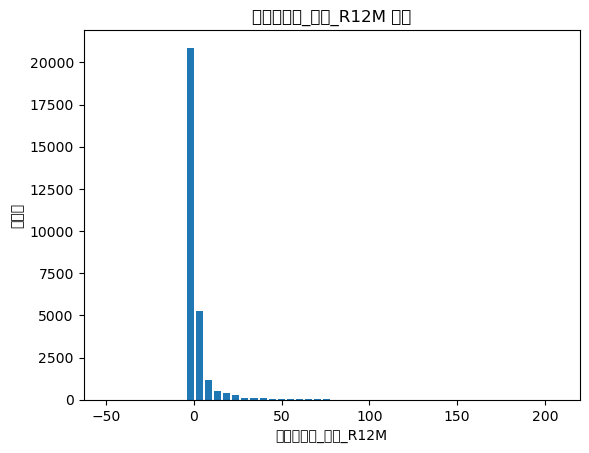

In [74]:
t = df[(df['고객구분'] == '22.Active_간헐')] 

plt.hist(data=t, x='이용건수_신용_B0M', bins=(50) ,width  = 4)
plt.xlabel('이용개월수_신용_R12M')
plt.ylabel('빈도수')
plt.title('이용개월수_신용_R12M 분포')
plt.show()


In [64]:
# 이용건수_신용_B0M 나누기
def get_age_group(age):
    if age < 5:
        return '5미만'
    elif age < 10:
        return '10미만'
    elif age < 15:
        return '15미만'
    elif age < 20:
        return '20미만'
    else:
        return '20이상'
# '연령대' 열 추가
df['이용건수대'] = t['이용건수_신용_B0M'].apply(get_age_group)
df['이용건수대'].value_counts()

5미만     25117
10미만     1844
20이상      967
15미만      666
20미만      441
Name: 이용건수대, dtype: int64

In [65]:
# 이용건수_신용_B0M 나누기
def get_age_group(age):
    if age < 0:
        return '0미만'
    elif age == 0:
        return '0'
    elif age == 1:
        return '1'
    elif age == 2:
        return '2'
    elif age == 3:
        return '3'
    elif age == 4:
        return '4'
    elif age == 5:
        return '5'
    else:
        return '6이상'
# '연령대' 열 추가
df['이용건수대'] = t['이용건수_신용_B0M'].apply(get_age_group)
df['이용건수대'].value_counts()

0      14018
1       6705
6이상     3341
2       2171
3       1248
4        811
5        577
0미만      164
Name: 이용건수대, dtype: int64

In [66]:
# 이용건수_신용_B0M 나누기
def get_age_group(age):
    if age < 5:
        return '5미만'
    elif age < 10:
        return '10미만'
    elif age < 15:
        return '15미만'
    elif age < 20:
        return '20미만'
    else:
        return '20이상'
# '연령대' 열 추가
df['이용건수대'] = t['이용건수_신용_B0M'].apply(get_age_group)
df['이용건수대'].value_counts()

5미만     25117
10미만     1844
20이상      967
15미만      666
20미만      441
Name: 이용건수대, dtype: int64

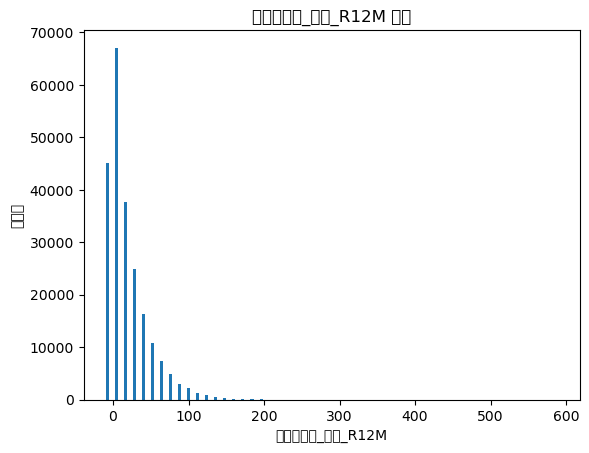

In [70]:
f = df[(df['고객구분'] == '21.Active_연속')] 

plt.hist(data=f, x='이용건수_신용_B0M', bins=(50) ,width  = 4)
plt.xlabel('이용개월수_신용_R12M')
plt.ylabel('빈도수')
plt.title('이용개월수_신용_R12M 분포')
plt.show()


In [72]:
# 이용건수_신용_B0M 나누기
def get_age_group(age):
    if age < 0:
        return '0미만'
    elif age == 0:
        return '0'
    elif age == 1:
        return '1'
    elif age == 2:
        return '2'
    elif age == 3:
        return '3'
    elif age == 4:
        return '4'
    elif age == 5:
        return '5'
    else:
        return '6이상'
# '연령대' 열 추가
df['이용건수대'] = f['이용건수_신용_R12M'].apply(get_age_group)
df['이용건수대'].value_counts()

6이상    221876
4         531
5         399
3          53
0미만         3
0           1
Name: 이용건수대, dtype: int64

In [75]:
# 이용건수_신용_B0M 나누기
def get_age_group(age):
    if age < 0:
        return '0미만'
    elif age == 0:
        return '0'
    elif age == 1:
        return '1'
    elif age == 2:
        return '2'
    elif age == 3:
        return '3'
    elif age == 4:
        return '4'
    elif age == 5:
        return '5'
    else:
        return '6이상'
# '연령대' 열 추가
df['이용건수대'] = t['이용건수_신용_R12M'].apply(get_age_group)
df['이용건수대'].value_counts()

6이상    24554
2       1091
3        911
1        864
5        797
4        763
0         46
0미만        9
Name: 이용건수대, dtype: int64

In [76]:
count = len(df[(df['고객구분'] == '22.Active_간헐') & (df['이용후경과월_신용'] == 0)])

# 개수 출력
print(count)

14645


In [78]:
a= df[(df['고객구분'] == '21.Active_연속') & (df['이용후경과월_신용'] == 0)]

a['이용금액대'].value_counts()

222863


In [79]:
count = len(df[(df['고객구분'] == '22.Active_간헐') & (df['이용후경과월_신용'] != 0)])

# 개수 출력
print(count)

14390


In [80]:
a['이용금액대'].value_counts()

NameError: name 'a' is not defined

In [83]:
a = df[(df['고객구분'] == '22.Active_간헐') & (df['이용후경과월_신용'] == 0)]
a['이용금액대'].value_counts()


05.10만원-     7718
04.10만원+     2808
02.50만원+     1381
03.30만원+     1302
01.100만원+    1280
09.미사용        156
Name: 이용금액대, dtype: int64

In [85]:
len(df[df['혜택수혜금액']>0])

137027